# The Sparks Foundation - Data Science & Business Analytics Internship

 # Author : SM. Hasinur Rahman

## TASK 1 - Prediction using Supervised Machine Learning

In this task it is required to predict the percentage of a student on the basis of number of hours studied using the Linear Regression supervised machine learning algorithm.

## Machine Learning With Python Scikit-learn : Linear Regression With two Variable

## This is a simple linear regression task
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

## Problem Statement: What will be predicted score if a student studies for 9.25 hours/day?

## Import Library

In [ ]:
# Import required library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# To ignore the warnings
import warnings as wg
wg.filterwarnings("ignore")

## Load Dataset

In [ ]:

url = "http://bit.ly/w-data"
df = pd.read_csv(url)
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [ ]:
df.shape

(25, 2)

In [ ]:
# check full data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
# check null value
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

from avobe output we can see that this dataset have no null value.so, now we can moving next step.

## Data visualization & processing

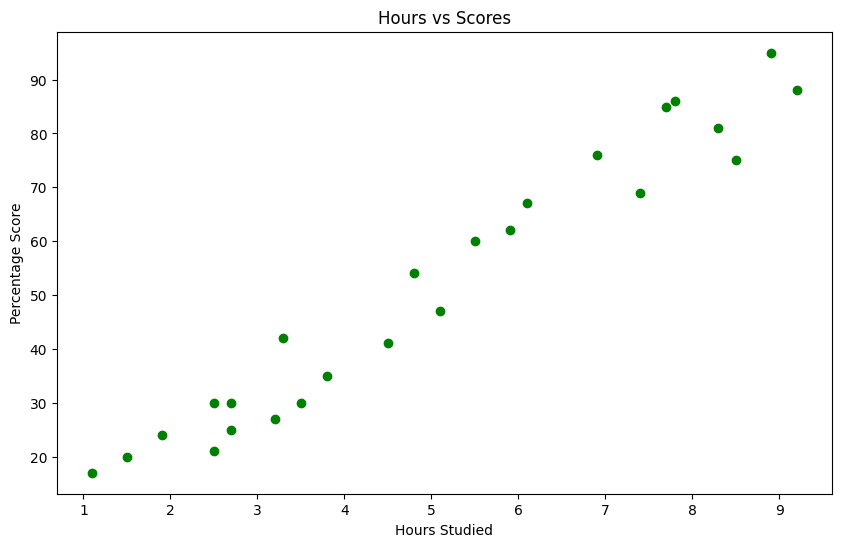

In [ ]:
# Plotting the distribution scores according to hours
plt.rcParams["figure.figsize"] = [10,6]
plt.scatter(df.Hours, df.Scores, color = "green", marker ='o')
plt.title('Hours vs Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()


**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

In [ ]:
# we can also use .corr to determine the corelation between the variables
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


## Data preprocessing

In [ ]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
# using iloc function we will divide the data
feature = df.iloc[:, :1].values
target = df.iloc[:, 1:].values

In [ ]:
feature

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [ ]:
target

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]])

# # Train and Test Split

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(
    feature, target, test_size=0.2, random_state=42
)

In [ ]:
xtrain.shape, ytrain.shape

((20, 1), (20, 1))

In [ ]:
xtest.shape, ytest.shape

((5, 1), (5, 1))

## Train the Algorithm

In [ ]:
# create linear Regression object
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# model initialization
model = LinearRegression()

# training model
model.fit(xtrain, ytrain)

LinearRegression()

## visualization the Model (After training the model)



In [ ]:
model.coef_ # value of b

array([[9.68207815]])

In [ ]:
model.intercept_ # value of a

array([2.82689235])

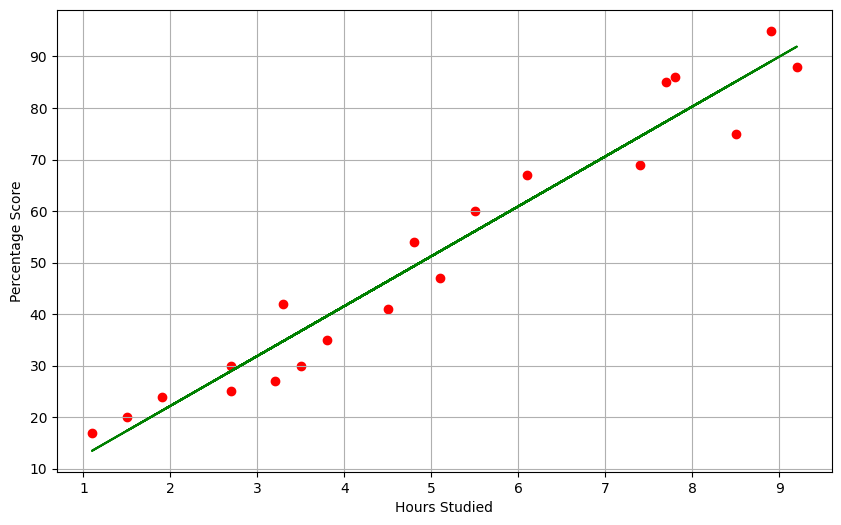

In [ ]:
x = model.coef_*feature + model.intercept_

# Plotting for the training data
plt.rcParams["figure.figsize"] = [10,6]
plt.scatter(xtrain, ytrain, color='red')
plt.plot(feature, x , color='green');
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

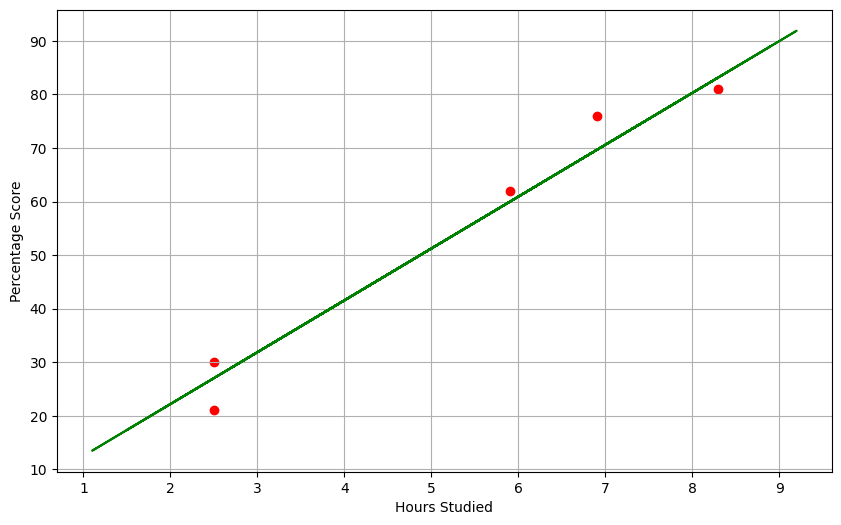

In [ ]:
# Plotting for the training data
plt.rcParams["figure.figsize"] = [10,6]
plt.scatter(xtest, ytest, color='red')
plt.plot(feature, x , color='green');
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

## Making Prediction

In [ ]:
print(xtest) # Testing data - In Hours
y_pred = model.predict(xtest) # Predicting the scores

[[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]]


In [ ]:
y_pred

array([[83.18814104],
       [27.03208774],
       [27.03208774],
       [69.63323162],
       [59.95115347]])

In [ ]:
ytest

array([[81],
       [30],
       [21],
       [76],
       [62]])

In [ ]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': ytest.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


# predicted score

In [ ]:
# now find out scores according to study hour 9.25 hours/day

hours = 9.25
predicted_score = model.predict([[hours]])
print("No of Hours:" , hours)
print("The predicted score if a person studies for",hours,"hours is","Predicted Score will be =", predicted_score[0])


No of Hours: 9.25
The predicted score if a person studies for 9.25 hours is Predicted Score will be = [92.38611528]


# Evaluation the Model
## The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset.

In [ ]:
print('Mean Absolute Error:',
      metrics.mean_absolute_error(ytest, y_pred))
print("r2_score:", r2_score(ytest, y_pred)*100)

Mean Absolute Error: 3.9207511902099244
r2_score: 96.78055545167994


In [ ]:
# Evaluation
mse = mean_squared_error(ytest, y_pred)
r2 = r2_score(ytest, y_pred)

In [ ]:
mse, r2*100

(18.943211722315272, 96.78055545167994)